In [ ]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randint
from matplotlib.patches import Rectangle


BASE_DATA_PATH = 'data/HandLocalization/EgoHands/'
TRAIN_DATAPATH = os.path.join(BASE_DATA_PATH, 'train')
VAL_DATAPATH = os.path.join(BASE_DATA_PATH, 'valid')
TRAIN_IMAGES_DIR = os.path.join(TRAIN_DATAPATH, 'images')
TRAIN_LABELS_DATAPATH = os.path.join(TRAIN_DATAPATH, '_annotations.txt')
VAL_IMAGES_DIR = os.path.join(VAL_DATAPATH, 'images')
VAL_LABELS_DATAPATH = os.path.join(VAL_DATAPATH, '_annotations.txt')

num_train_data = len(os.listdir(TRAIN_IMAGES_DIR))
num_val_data = len(os.listdir(VAL_IMAGES_DIR))
print("Number of train data:", num_train_data)
print("Number of val data:", num_val_data)

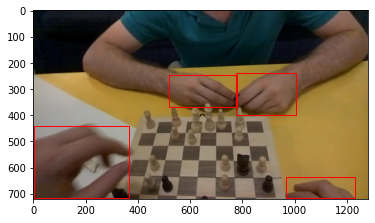

In [141]:
rand_index = randint(0, num_train_data-1)
all_train_img_paths = os.listdir(TRAIN_IMAGES_DIR)
rand_img_name = all_train_img_paths[rand_index]
rand_img_path = os.path.join(TRAIN_IMAGES_DIR, rand_img_name)

img = mpimg.imread(rand_img_path)
imgplot = plt.imshow(img)
ax = plt.gca()

with open(TRAIN_LABELS_DATAPATH) as all_boxes:
    for img_boxes in all_boxes:
        splitted_boxes = img_boxes.rsplit()
        if splitted_boxes[0] == rand_img_name:
            for box in splitted_boxes[1:]:
                coords = box.split(sep=',')
                coords = np.array(coords, dtype=np.float32)
                width = coords[2] - coords[0]
                height = coords[3] - coords[1]
                rect = Rectangle((coords[0], coords[1]), width, height, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

plt.show()

In [142]:
def get_yolo_box(coords):
    x_min, y_min, x_max, y_max = coords
    x_center = (x_min + x_max) / 2.
    y_center = (y_min + y_max) / 2.
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

In [153]:
boxes = {}

with open(TRAIN_LABELS_DATAPATH) as all_boxes:
    for single_img_boxes in all_boxes:
        img_boxes = []
        splitted_boxes = single_img_boxes.rsplit()
        box_id = splitted_boxes[0]
        splitted_boxes = [el.split(sep=',') for el in splitted_boxes][1:]
        splitted_boxes = np.array(splitted_boxes, np.int32)
        for box in splitted_boxes:
            box_class = box[-1]
            x_c, y_c, w, h = get_yolo_box(box[:-1])
            img_boxes.append(np.array([x_c, y_c, w, h, box_class]))
        boxes[box_id] = np.array(img_boxes)

SAVE_FILENAME = 'new_training_boxes.npz'
np.savez(SAVE_FILENAME, **boxes)
print('Bounding boxes saved to file:', SAVE_FILENAME)


Bounding boxes saved to file: new_training_boxes.npz


Rand boxes [[866.5 617.5 337.  201.    1. ]
 [793.5 382.5 237.  129.    2. ]
 [582.  339.  220.  144.    3. ]]


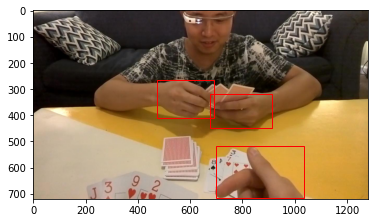

In [154]:
rand_index = randint(0, num_train_data-1)
rand_img_name = all_train_img_paths[rand_index]

FILENAME = 'new_training_boxes.npz'
all_boxes = np.load(FILENAME, allow_pickle=True)
rand_img_boxes = all_boxes.get(rand_img_name)

print("Rand boxes", rand_img_boxes)

rand_img_path = os.path.join(TRAIN_IMAGES_DIR, rand_img_name)
img = mpimg.imread(rand_img_path)
imgplot = plt.imshow(img)
ax = plt.gca()

for box in rand_img_boxes:
    x_c, y_c, w, h, _ = box
    x_min = x_c - w / 2.
    y_min = y_c - h / 2.
    rect = Rectangle((x_min, y_min), w, h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [155]:
boxes = {}

with open(VAL_LABELS_DATAPATH) as all_boxes:
    for single_img_boxes in all_boxes:
        img_boxes = []
        splitted_boxes = single_img_boxes.rsplit()
        box_id = splitted_boxes[0]
        splitted_boxes = [el.split(sep=',') for el in splitted_boxes][1:]
        splitted_boxes = np.array(splitted_boxes, np.int32)
        for box in splitted_boxes:
            box_class = box[-1]
            x_c, y_c, w, h = get_yolo_box(box[:-1])
            img_boxes.append(np.array([x_c, y_c, w, h, box_class]))
        boxes[box_id] = np.array(img_boxes)

SAVE_FILENAME = 'new_val_boxes.npz'
np.savez(SAVE_FILENAME, **boxes)
print('Bounding boxes saved to file:', SAVE_FILENAME)

Bounding boxes saved to file: new_val_boxes.npz


Rand boxes [[802.5 668.5 213.   99.    1. ]
 [775.  392.  132.   94.    2. ]
 [645.5 386.5 107.  109.    3. ]]


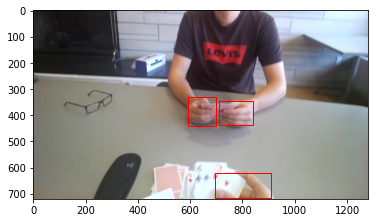

In [156]:
rand_index = randint(0, num_val_data-1)
all_val_img_paths = os.listdir(VAL_IMAGES_DIR)
rand_img_name = all_val_img_paths[rand_index]
rand_img_path = os.path.join(VAL_IMAGES_DIR, rand_img_name)


FILENAME = 'new_val_boxes.npz'
all_boxes = np.load(FILENAME, allow_pickle=True)
rand_img_boxes = all_boxes.get(rand_img_name)

print("Rand boxes", rand_img_boxes)

img = mpimg.imread(rand_img_path)
imgplot = plt.imshow(img)
ax = plt.gca()

for box in rand_img_boxes:
    x_c, y_c, w, h, _ = box
    x_min = x_c - w / 2.
    y_min = y_c - h / 2.
    rect = Rectangle((x_min, y_min), w, h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

plt.show()


In [ ]:
rand_index = randint(0, num_train_data-1)
rand_img_name = all_train_img_paths[rand_index]

FILENAME = 'new_training_boxes.npz'
all_boxes = np.load(FILENAME, allow_pickle=True)

for box in all_boxes.values():
    print(box)